# Customer Churn Prediction

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [69]:
data = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')

data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Understanding

The SyriaTel dataset contains 3333 rows and 21 columns. The columns are brokendown into these categories:

1. Customer Demographics:

- state: This categorical variable might represent the customer's state of residence. While potentially useful for understanding geographic trends, its use 
might be limited due to privacy concerns.

- account length: number of months customers have held an account will the company

- area code: Similar to state, this categorical variable identifies the customer's area code.

- phone number: This unique identifier is likely anonymized for privacy reasons and not directly used in analysis.

2. Plan and Service Usage:

- international plan: This binary variable indicates whether the customer has an international calling plan (1) or not (0).

- voice mail plan: This binary variable indicates whether the customer has a voicemail plan (1) or not (0).

- number vmail messages: This numerical variable represents the total number of voicemail messages received by the customer.

3. Call Activity:

- total day minutes, total day calls, total day charge: These numerical variables capture the total minutes spent, number of calls made, and total charges incurred during daytime hours.

- total eve minutes, total eve calls, total eve charge: Similar to the above, these features represent usage and charges for evening calls.

- total night minutes, total night calls, total night charge: These capture usage and charges for calls made at night.

- total intl minutes, total intl calls, total intl charge: These features represent the total minutes, number of calls, and charges associated with international calls.

4. Customer Service Interaction:

- customer service calls: This numerical variable indicates the total number of calls made by the customer to SyriaTel's customer service department.

5. Target Variable

- churn: This binary variable is the target variable of the dataset. It indicates whether the customer churned (1) or did not churn (0). This is the key variable used to predict customer churn.

## Overview of Dataset

- Check the following details about the dataset:

    1. Unique Values
   
    2. Statistical Description of Data
   
    3. Value count of target variables

    4. Dropping irrelevant columns



In [70]:
# View the Unique Values
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [72]:
# Get statistical description of the data
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [73]:
#Get the value counts of the target variable
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

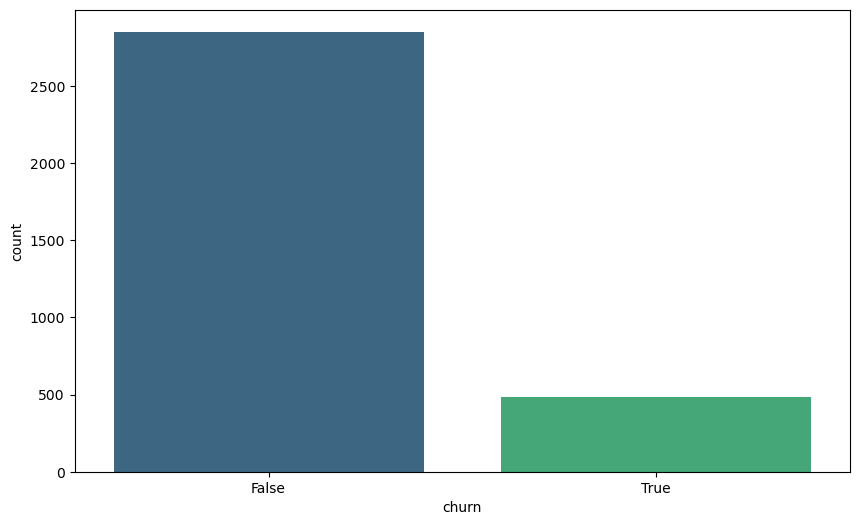

In [74]:
#Visualize the Value Counts
plt.figure(figsize=(10,6))

sns.countplot(x='churn',data=data,palette='viridis')

In [75]:
# Drop the phone number column.
data.drop(['phone number'],axis=1,inplace=True)
data.shape

(3333, 20)

# Data Pre-processing

**Check for missing values**

In [76]:
# Loop over all missing values

null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)

# Visualize the output
null = pd.DataFrame(null_num,index=data.columns,columns=['Total Missing Values'])
null

,Total Missing Values
state,0
account length,0
area code,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
total eve minutes,0


## Binary Represenation of Booleans


In [77]:
# Convert all booleans into binary
label_encoder = LabelEncoder()
data['churn'] = label_encoder.fit_transform(data['churn'])
data['international plan'] = label_encoder.fit_transform(data['international plan'])
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])

data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Feature Selection

- Combine the total day minutes and total eve minutes. Create a new column called Total Minutes

- Combine the total day calls and total eve calls. Create a new column called Total Calls

- Combine the total day charge and total eve charge. Create new column called Total Charge



In [78]:
# Create Total Minutes column
data['total minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes']
data['total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls']
data['total charge'] = data['total day charge'] + data['total eve charge'] + data['total night charge']

# Drop the original columns
data.drop(['total day minutes', 'total eve minutes','total night minutes'], axis=1,inplace=True)
data.drop(['total day calls', 'total eve calls', 'total night calls'], axis=1,inplace=True)
data.drop(['total day charge', 'total eve charge', 'total night charge'], axis=1,inplace=True)

data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total calls,total charge
0,KS,128,415,0,1,25,10.0,3,2.70,1,0,707.2,300,72.86
1,OH,107,415,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
2,NJ,137,415,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
3,OH,84,408,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
4,OK,75,415,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36


# Univariate Analysis

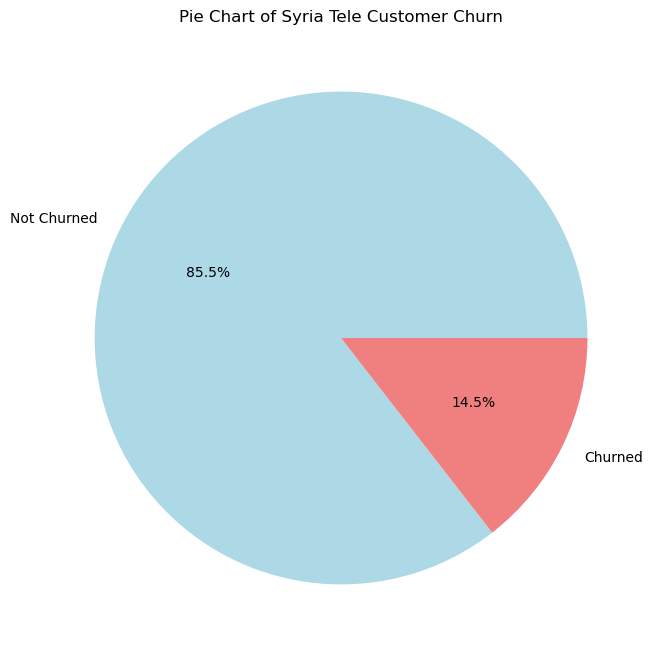

In [108]:
# Investigate the target variable - Pie Chart
plt.figure(figsize=(10, 8))
labels = ['Not Churned', 'Churned']
data['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=labels, colors=['lightblue', 'lightcoral'])
plt.title('Pie Chart of Syria Tele Customer Churn')
# Remove y axis
plt.ylabel('')
plt.show()


## Observation
- The churned rate is at 14.5% and the not churned rate is 85.5%. Syria Tele's customer retention is moderately high.

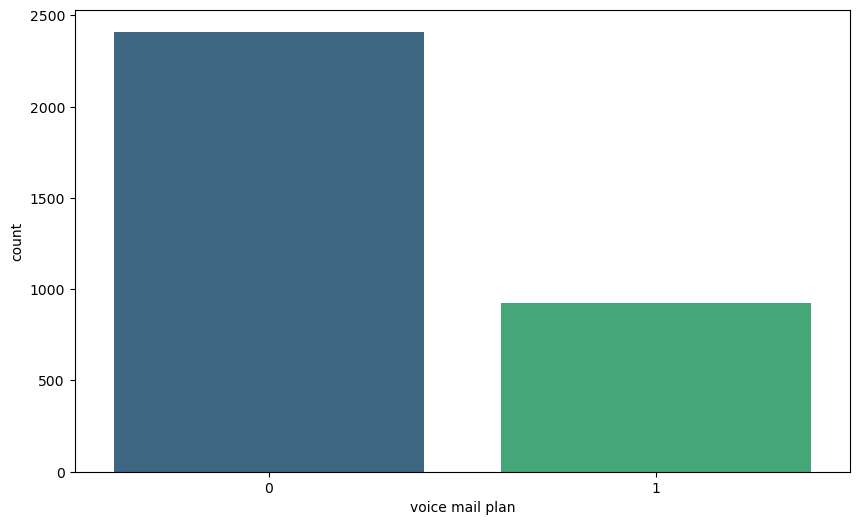

In [79]:
# Investigate the customers with voice mail plan
plt.figure(figsize=(10,6))
sns.countplot(x=data['voice mail plan'],palette='viridis')
plt.show()

#### Observation

**A high perecentage of the customers have not subscribed to a voice mail plan, this may be a factor contributing to low customer retention.**

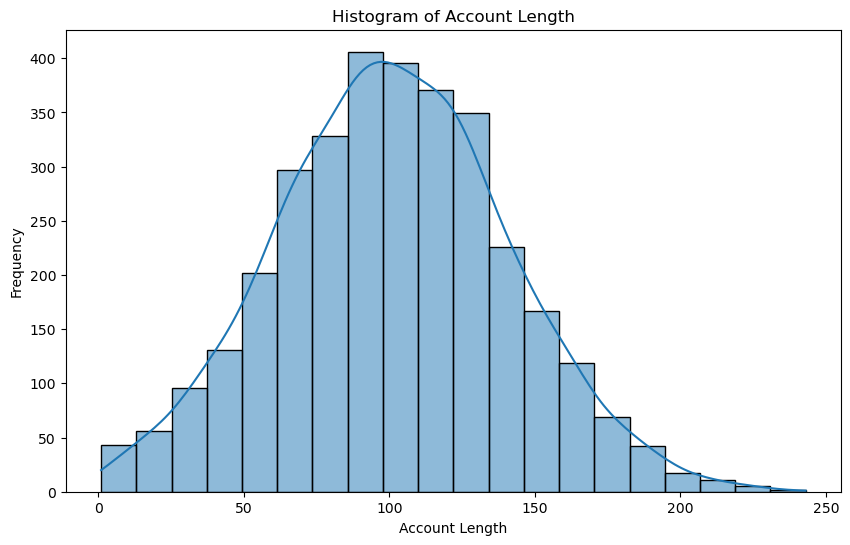

In [95]:
# Investigate the account length variable
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='account length', bins=20, kde=True)
plt.title('Histogram of Account Length')
plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.show()

## Observation

**Distribution** - The histrogram is skewed to the right. This may implies that Syria Tele's customers do not hold accounts for a long time. 

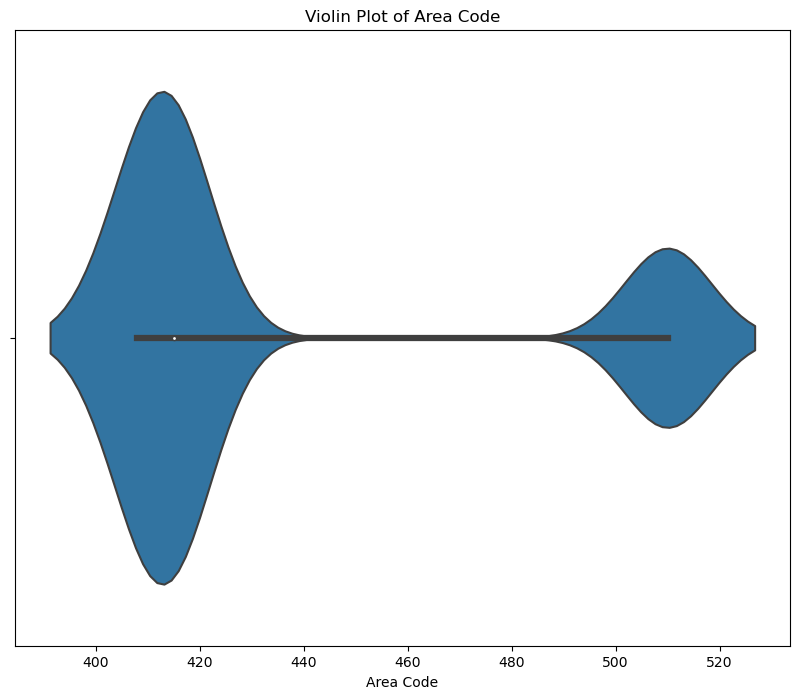

In [96]:
# Investigate the area code variable
plt.figure(figsize=(10,8))
sns.violinplot(x='area code',data=data)
plt.title("Violin Plot of Area Code")
plt.xlabel('Area Code')
plt.show()

## Observation
**Spread** - The width and shape of the violin communicates that a high number of customers  with area codes 400 to 420 live near the median.

**Outliers** - There are no outliers present

## Bivariate Analysis

- Conduct bivariate analysis on the same variables with the target variables

In [97]:
# Filter the dataset to include only the churned customers
churned_customers = data[data['churn'] == 1]
# Group the data by state and count the churned customers
state_churn_counts = churned_customers.groupby('state').size()
# Calculate the percentage of churned customers for each state using .size()
total_customers_per_state = data.groupby('state').size()
percentage_churn_per_state = state_churn_counts / total_customers_per_state * 100
# Apply the lambda function
percentage_churn_per_state_lambda = data.groupby('state')['churn'].apply(lambda x: (x.sum() / x.count()) * 100)
# Visualize the output using pd.Dataframe
churn_rate_data = pd.DataFrame({'Percentage Churn': percentage_churn_per_state})

churn_rate_data.head()

,Percentage Churn
state,
AK,5.769231
AL,10.000000
AR,20.000000
AZ,6.250000
CA,26.470588


In [98]:
# Find the top states with highest churn rate
top10 = churn_rate_data.sort_values(by='Percentage Churn', ascending=False).head(11)
top10 = pd.DataFrame(top10)
top10.head()

,Percentage Churn
state,
NJ,26.470588
CA,26.470588
TX,25.000000
MD,24.285714
SC,23.333333


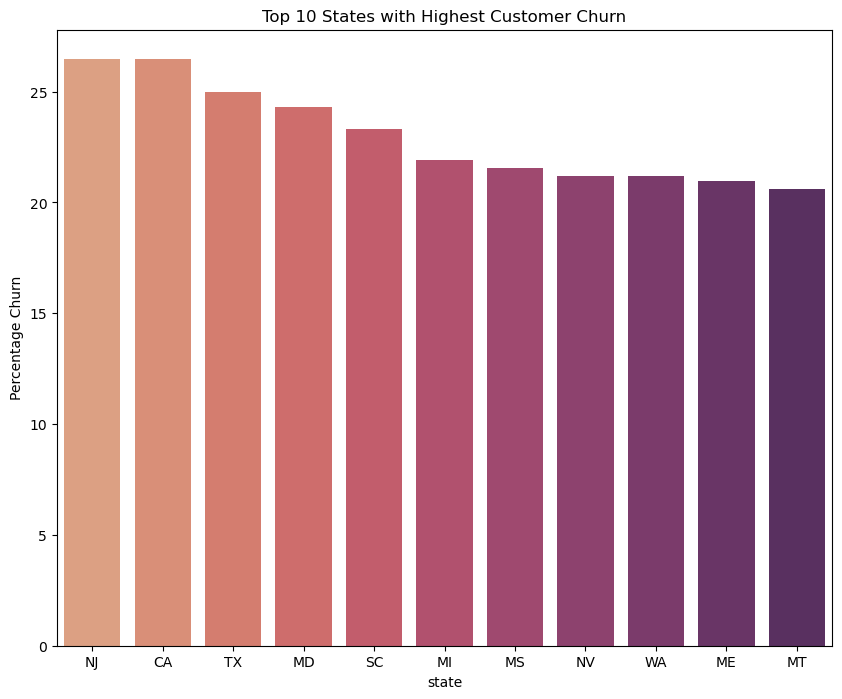

In [99]:
# Visulaize the top 10 States with Customer Churn
plt.figure(figsize=(10,8))
sns.barplot(x=top10.index, y='Percentage Churn', data=top10,palette='flare')
plt.title("Top 10 States with Highest Customer Churn")
plt.show()

## Observation

**The following states have the highest customer churn:**
- NJ: New Jersey

- CA: California

- TX: Texas

- MD: Maryland

- SC: South Carolina

- MI: Michigan

- MS: Mississippi

- NV: Nevada

- WA: Washington

- ME: Maine

- MT: Montana